In [1]:
import pandas as pd
import numpy as np
from fancyimpute import IterativeImputer
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,f1_score,balanced_accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.stats import randint
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('mendeleys.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'mendeleys.csv'

In [ ]:
df

In [ ]:
df=df.drop_duplicates()

In [ ]:
df['target'].value_counts()

In [ ]:
df.drop(columns=['patientid'],inplace=True)

In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
params = {"objective": "binary:logistic", "num_class": 1,'learning_rate':0.01,'seed':42,'n_estimators':100,
          'max_depth': 6,'subsample':1,'reg_lambda':0.1,'colsample_bytree':0.6}

model = xgb.XGBClassifier(**params)

evals = [(X_train, y_train)]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")

print("Cross-Validation accuracy Scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred_xg = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_xg)

print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
accuracy_score(y_train, model.predict(X_train))

In [ ]:
accuracy_XG = accuracy_score(y_test, y_pred_xg)
precision_XG = precision_score(y_test, y_pred_xg, pos_label=1)
recall_XG = recall_score(y_test, y_pred_xg, pos_label=1)
f1_XG = f1_score(y_test, y_pred_xg, pos_label=1)

In [ ]:
print(f'Accuracy:{accuracy_XG}\nPrecision:{precision_XG}\nRecall:{recall_XG}\nf1:{f1_XG}')

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_xg)
ConfusionMatrixDisplay(conf_matrix).plot();

# Random Forest

In [3]:
rf_classifier = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=42)

In [266]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
cross_val_scores

array([0.975  , 0.98125, 0.9875 , 0.95625, 0.98125])

In [267]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [268]:
y_pred_rf = rf_classifier.predict(X_test)

In [269]:
accuracy_score(y_train, rf_classifier.predict(X_train))

1.0

In [273]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label=1)
recall_rf = recall_score(y_test, y_pred_rf, pos_label=1)
f1_rf = f1_score(y_test, y_pred_rf, pos_label=1)

In [274]:
print(f'Accuracy:{accuracy_rf}\nPrecision:{precision_rf}\nRecall:{recall_rf}\nf1:{f1_rf}')

Accuracy:0.945
Precision:0.9487179487179487
Recall:0.9568965517241379
f1:0.9527896995708154


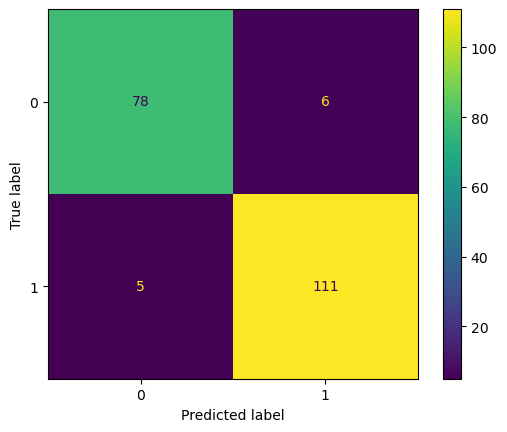

In [275]:
cm = confusion_matrix(y_test, y_pred_rf)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Stack Classifier

In [389]:
clf1 = LogisticRegression(C=0.1,penalty='l2')
clf2 = DecisionTreeClassifier(max_depth=10,min_samples_leaf=1,min_samples_split=10)
clf3 = KNeighborsClassifier(n_neighbors=5,weights='distance',p=1)

In [390]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


stacking_classifier = StackingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)],
    final_estimator=LogisticRegression(),
    stack_method='auto',
)

In [391]:
stacking_classifier.fit(X_train_normalized, y_train)

y_pred_sc = stacking_classifier.predict(X_test)

In [392]:
accuracy_score(y_train, stacking_classifier.predict(X_train_normalized))

0.998046875

In [393]:
accuracy_sc = accuracy_score(y_test, y_pred_sc)
precision_sc = precision_score(y_test, y_pred_sc, pos_label=1)
recall_sc = recall_score(y_test, y_pred_sc, pos_label=1)
f1_sc = f1_score(y_test, y_pred_sc, pos_label=1)


In [394]:
print(f'Accuracy:{accuracy_sc}\nPrecision:{precision_sc}\nRecall:{recall_sc}\nf1:{f1_sc}')

Accuracy:0.515625
Precision:0.515625
Recall:1.0
f1:0.6804123711340206


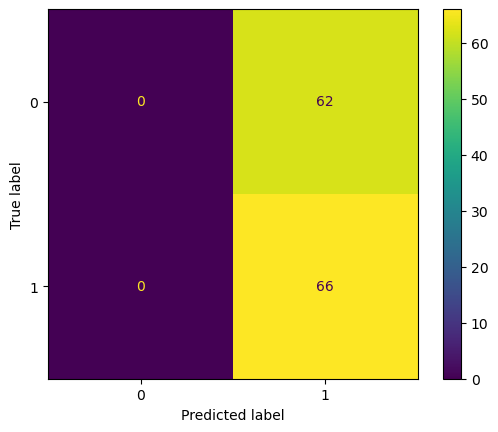

In [395]:
cm = confusion_matrix(y_test, y_pred_sc)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# SVM